# Limitaciones de la computadora

### María Fernanda López Juárez
### 08/Sep/20

In [2]:
# Matemáticamente, los enteros son un conjunto infinito, la computadora es de tamaño finito por lo cual es imposible representar todos esos números en la compu

#El tipo int se representa en 4-bytes, es decir, 32 bits. El numero máximo a nivel cpu está dado por 2^32

a = type(2**1001+1)
a

int

In [3]:
#Pero ya que queremos representar tanto los pos como los neg


[-2**32/2, 2**32/2]

[-2147483648.0, 2147483648.0]

In [4]:
#Límite superior de la computadora

import sys 
sys.maxsize

9223372036854775807

In [5]:
#Convertir a binario

bin(123)

'0b1111011'

In [6]:
#Genera una tabla del 0 al 255 con su representación binario y en decimal


# %d   Da formato como entero a lo que sea que vayas a imprimir

# %s   Representa algo que no es una cadena como cadena de caracteres

# \t   Te da una tabulación de espacio


for i in range(0,5):
    print("%d \t %s" % (i, bin(i)))

0 	 0b0
1 	 0b1
2 	 0b10
3 	 0b11
4 	 0b100


Pasa lo mismo con los reales. Recuerda que cualquier número real x puede ser escritos en términos de una mantisa y un exponente de base 10 exp b

Si tu cpu es de 32 bits, se utilizan 8 bytes para guardar un flotante, si es de 64 se utilizan 16 bytes 

#### ¿Cuál es el número flotante más grande y más pequeño que se puede representar?

2^32 en positivo y negativo

In [8]:
# Notemos algo: La computadora tiene errores de precisión. Por ejemplo, veamos

x = 0.0
for i in range(0,15):
    x = x + 0.1
    print("x=%19.17g" % (x))
    
# Recuerda que el problema original era un while que se detenia cuando x = 1
# En realidad nunca toma el valor de 1. Ese error de precisión lo hace un bucle infinito

x=0.10000000000000001
x=0.20000000000000001
x=0.30000000000000004
x=0.40000000000000002
x=                0.5
x=0.59999999999999998
x=0.69999999999999996
x=0.79999999999999993
x=0.89999999999999991
x=0.99999999999999989
x= 1.0999999999999999
x=                1.2
x=                1.3
x= 1.4000000000000001
x= 1.5000000000000002


In [9]:
# Una manera de resolver el problema es con distancias. 
# Defines que la distancia de x a 1 sea súper pequeña y entonces te aproximas como si fuera un límite

x = 0.0
while abs(x -1.0) > 1e-10:
    x = x + 0.1
    print ("x=%19.17g" % (x))

x=0.10000000000000001
x=0.20000000000000001
x=0.30000000000000004
x=0.40000000000000002
x=                0.5
x=0.59999999999999998
x=0.69999999999999996
x=0.79999999999999993
x=0.89999999999999991
x=0.99999999999999989


## Cálculo simbólico

Literalmente conviertes tus variables en variables... como en maple

In [10]:
# Usamos el paquete sympy

from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [11]:
from sympy import Symbol 

#Desde la librería sympy importa la función symbol 

x = Symbol('x')  #Convertimos a x en simbolo
x

In [12]:
type(x)

sympy.core.symbol.Symbol

In [13]:
y = Symbol('y')

In [14]:
y

In [15]:
#Hace operaciones con variables

2*x - x

In [16]:
x + y + x - 10*y*x

In [17]:
import sympy as sym

x, y, z = sym.symbols('x,y,z')
x + 2*y + 3*z - x

In [18]:
#Sympy también representa numeros reales y racionales


# var = sym.Rational(numerador,denominado)
a = sym.Rational(1,10)
a

In [19]:
b = sym.Rational(45,67)
b

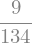

In [20]:
#Puedes hacer operaciones con los numeros racionales

c = a*b
c

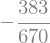

In [21]:
d = a-b
d

In [23]:
# También los puedes pasar a decimales

float(c)

In [24]:
#También puedes usar el siguiente método para indicarle a python cuántos decimales calcular

#Aquí lo convierte a float con un numero x de decimales

c.evalf()

In [25]:
#COnvertir a float con 30 decimales

c.evalf(30)

In [27]:
from sympy import *

In [28]:
#Derivanding 

#diff(funcion, variable)

diff(sin(x),x)

In [29]:
#Deriva con respecto a la variable y sustituye la variable que indiques con el valor

diff(10+3*x+4*x**2+45*x*y, x).subs(x, 1)

In [30]:
#Segunda derivada

diff(10+3*x+4*x**2+45*x*y, x,x)

In [31]:
# Derivando con respecto a x y luego con respecto a y

diff(10+3*x+4*x**2+45*x*y, x,y)

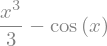

In [32]:
#Integranding con respecto a x

integrate(x**2 + sin(x), x)

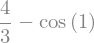

In [33]:
#Integral definida de cero a uno con respecto a x

integrate(x**2 + sin(x), (x, 0, 1))

In [34]:
#También podemos resolver ecuaciones diferenciales ordinarias con la función dsolve

y = Function('y')
x = Symbol('x')
y_ = Derivative(y(x), x)

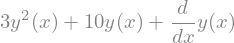

In [35]:
ode = y_ + 10*y(x) + 3*y(x)**2
ode

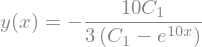

In [36]:
sol = dsolve(ode, y(x))
sol

In [37]:
type(sol)

#Nótese que es una ecuación

sympy.core.relational.Equality

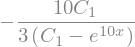

In [38]:
sol.rhs

#Aquí te da el lado derecho de la ecuación

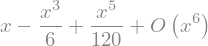

In [39]:
#También podemos calcular aproximaciones con series. Sympy puede hacerlas


#La serie de Taylor de sen(x) alrededor de cero
sin(x).series(x,0)

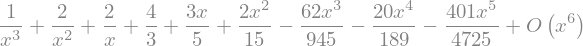

In [40]:
(exp(x)**2*cos(x)/sin(x)**3).series(x,0)

In [41]:
# También hay una forma de resolver el problema de precision de los flotantes

#Desventaja: usar sympy es muy tardado

dx = Rational(1,10)

In [42]:
x = 0
while x != 1.0:
    x = x+dx
    print("x=%4s = %3.1f" % (x, x.evalf()))

x=1/10 = 0.1
x= 1/5 = 0.2
x=3/10 = 0.3
x= 2/5 = 0.4
x= 1/2 = 0.5
x= 3/5 = 0.6
x=7/10 = 0.7
x= 4/5 = 0.8
x=9/10 = 0.9
x=   1 = 1.0


In [43]:
#Observa, aquí estamos sumando un decimo en fracción

dx_symbolic = Rational(1,10)

def bucle_sympy(n):
    x = 0
    for i in range(n):
        x = x + dx_symbolic
    return x

In [44]:
#Aquí lo que estamos viendo es lo mismo que antes pero con 0.1

dx = 0.1
def bucle_float(n):
    x = 0
    for i in range(n):
        x = x + dx
    return x

n = 10000

In [45]:
%timeit bucle_sympy(n)

1.77 s ± 543 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit bucle_float(n)

3.2 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<div class="alert alert-info">
**Ejercicio:** Resuelva simbólicamente lo siguiente: Se lanza una pelota al aire con una velocidad $v_0$ a un ángulo $\theta$. La gravedad es $g$. 
- ¿Cuál es la altura máxima? 
- ¿Cuál es la distancia máxima?
- ¿Cuál es el tiempo de vuelo?
- De una respuesta numérica, cuando $v_0 = 10 \frac{m}{s}$ y $\theta=\pi/2$.
</div>

In [63]:
x = Symbol('x')
theta = Symbol('theta')
g = Symbol('g')

In [64]:
v0 = Symbol('v_0')
v0

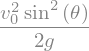

In [65]:
alt =(v0**2 * sin(theta)**2)/(2*g)
alt

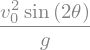

In [67]:
distancia = (v0**2*sin(2*theta))/g
distancia

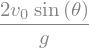

In [68]:
tiempo = (2*v0*sin(theta))/g
tiempo

In [69]:
alt.subs(g,9.81).subs(theta,pi/2).subs(v0,10)

In [70]:
distancia.subs(g,9.81).subs(theta,pi/2).subs(v0,10)

In [71]:
tiempo.subs(g,9.81).subs(theta,pi/2).subs(v0,10)